# Data cleansing

An introduction to data cleansing.

In [1]:
# Import dataset
import pandas as pd
import numpy as np

df = pd.read_csv("../../../data/raw/Titanic-Dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Duplicate rows

Check for duplicate rows

In [4]:
duplicate_rows_count = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_rows_count}")

Total number of duplicate rows: 0


# Identify Column Data Types

List comprehension with .dtype attribute to separate categorical and numerical columns.
object dtype: Generally used for text or categorical data.

In [5]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# Count Unique Values in the Categorical Columns

df[numeric_columns].nunique(): Returns count of unique values per column.

In [6]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

# Find missing values

Using df.isnull()

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Drop Irrelevant or Data-Heavy Missing Columns

- df.drop(columns=[]): Drops specified columns from the DataFrame.
- df.dropna(subset=[]): Removes rows where specified columns have missing values.
- fillna(): Fills missing values with specified value (e.g., mean).

In [8]:
df1 = df.drop(columns=["Name", "Ticket", "Cabin"])
df1.dropna(subset=["Embarked"], inplace=True)
df1["Age"].fillna(df1["Age"].mean(), inplace=True)

/tmp/ipykernel_10645/4027831296.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Age"].fillna(df1["Age"].mean(), inplace=True)


# Detect Outliers with Box Plot

- matplotlib.pyplot.boxplot(): Displays distribution of data, highlighting median, quartiles and outliers.
- plt.show(): Renders the plot.

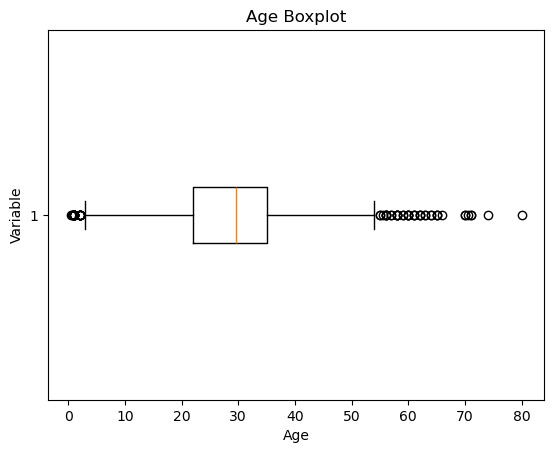

In [9]:
import matplotlib.pyplot as plt

plt.boxplot(df1["Age"], vert=False)
plt.ylabel("Variable")
plt.xlabel("Age")
plt.title("Age Boxplot")
plt.show()

# Calculate Outlier Boundaries and Remove Them

- Calculate mean and standard deviation (std) using df['Age'].mean() and df['Age'].std().
- Define bounds as mean ± 2 * std for outlier detection.
- Filter DataFrame rows within bounds using Boolean indexing.

In [10]:
# Calculate mean and standard deviation
mean = df1["Age"].mean()
std = df1["Age"].std()

# Define bounds
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

# Create new data frame without outliers
df2 = df1[(df1["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]

/tmp/ipykernel_10645/3927341896.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[(df1["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]


# Impute Missing Data Again if Any

- fillna() applied again on filtered data to handle any remaining missing values.

In [11]:
df3 = df2.fillna(df2["Age"].mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Recalculate Outlier Bounds and Remove Outliers from the Updated Data

- mean = df3['Age'].mean(): Calculates the average (mean) value of the Age column in the DataFrame df3.
- std = df3['Age'].std(): Computes the standard deviation (spread or variability) of the Age column in df3.
- lower_bound = mean - 2 * std: Defines the lower limit for acceptable Age values, set as two standard deviations below the mean.
- upper_bound = mean + 2 * std: Defines the upper limit for acceptable Age values, set as two standard deviations above the mean.
- df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]: Creates a new DataFrame df4 by selecting only rows where the Age value falls between the lower and upper bounds, effectively removing outlier ages outside this range.

In [12]:
# Calculate mean and standard deviation
mean = df3['Age'].mean()
std = df3['Age'].std()

# Lower and upper bounds
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print('Lower Bound: ', lower_bound)
print('Upper Bound: ', upper_bound)

# Create new dataframe with the removed outliers
df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]

Lower Bound:  6.242527560949977
Upper Bound:  51.765236414205305


# Step 12: Data formatting

Data formatting involves converting the data into a standard format or structure that can be easily processed by the algorithms or models used for analysis. Here we will discuss commonly used data formatting techniques i.e. Scaling and Normalization.

Scaling involves transforming the values of features to a specific range. It maintains the shape of the original distribution while changing the scale. It is useful when features have different scales and certain algorithms are sensitive to the magnitude of the features. Common scaling methods include:

1. Min-Max Scaling: Min-Max scaling rescales the values to a specified range, typically between 0 and 1. It preserves the original distribution and ensures that the minimum value maps to 0 and the maximum value maps to 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()